In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from snowflakeManager import SnowflakeManager
import warnings

warnings.filterwarnings("ignore")

In [55]:
sm = SnowflakeManager()

In [56]:
df = sm.fetch_selling_data()

In [57]:
df.shape

(9271036, 20)

In [58]:
df.head(5)

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,782344,55750557.0,Pessoa Física,F,1980-11-18,10085918,VONAU FLASH 4MG 10CP,MEDICAMENTOS,REFERENCIA,764,RS,80400,PORTO ALEGRE,2024-04-11 17:13:25,1.0,NaN,47.03,12.70,47.03,34.33
1,759507,55750557.0,Pessoa Física,F,1980-11-18,10106687,APTANUTRI PREMIUM 3,NUTRICAO,NUTRICAO LEITES,764,RS,80400,PORTO ALEGRE,2024-02-19 15:47:17,1.0,NaN,73.99,14.80,73.99,59.19
2,742082,55750557.0,Pessoa Física,F,1980-11-18,10037705,TORRADA ISABELA 142G TRADICIONAL,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-01-05 19:48:52,1.0,NaN,5.99,0.00,5.99,5.99
3,747733,55750557.0,Pessoa Física,F,1980-11-18,10004419,OZEMPIC 1MG 4AGULHAS NOVOFINE,MEDICAMENTOS,PBM ESPECIAL,764,RS,80400,PORTO ALEGRE,2024-01-20 14:41:56,1.0,NaN,1220.52,254.37,1220.52,966.15
4,748216,55750557.0,Pessoa Física,F,1980-11-18,10030435,NOVALGINA 1G 20CP OPELLA,MEDICAMENTOS,REFERENCIA ONEROSOS,764,RS,80400,PORTO ALEGRE,2024-01-22 16:48:36,1.0,100271131.0,41.51,5.52,41.51,35.99


In [59]:
df.isnull().sum()

COD_CUPOM                          0
COD_CLIENTE                      178
CLIENTE_FISICO_JURIDICO        10051
SEXO_CLIENTE                  103541
DTNASCIMENTO_CLIENTE         1078012
COD_SKU                            0
SKU                                0
CATEGORIA_SKU                      0
SUBCATEGORIA_SKU                   0
COD_LOJA                           0
UF_CIDADE                          0
COD_CIDADE                         0
NOME_CIDADE                        0
DATA_CUPOM                         0
UNIDADES                           0
IDENTIFICADOR_PROMOCIONAL    6735816
PRECO_REGULAR                      0
TOTAL_DESCONTO                    73
TOTAL_BRUTO                        0
TOTAL_LIQUIDO                      0
dtype: int64

# Data Dict

In [60]:
print(sm.run_query("SELECT GET_DDL('TABLE', 'PUC_VENDAS');")[0][0])

create or replace dynamic table PUC_VENDAS(
	COD_CUPOM COMMENT 'Código do cupom de venda',
	COD_CLIENTE COMMENT 'Identificador do cadastro do cliente, cada cliente possui um código único',
	CLIENTE_FISICO_JURIDICO COMMENT 'Identificador de se o cliente se trata de uma pessoa física ou jurídica.',
	SEXO_CLIENTE COMMENT 'Identificador do sexo do cliente. M=Masculino, F=Feminino, null=Pessoa jurídica e/ou não informado',
	DTNASCIMENTO_CLIENTE COMMENT 'Data de nascimento do cliente',
	COD_SKU COMMENT 'Código de produto interno da São João para identificar o produto da venda',
	SKU COMMENT 'Descrição do produto',
	CATEGORIA_SKU COMMENT 'Descrição da categoria do produto, internamente conhecido como grupo de produto.',
	SUBCATEGORIA_SKU COMMENT 'Descrição da subcategoria do produto, internamente conhecido como subgrupo de produto.',
	COD_LOJA COMMENT 'Identificador da loja da São João onde ocorreu a venda.',
	UF_CIDADE COMMENT 'Identificador da UF onde ocorreu a venda.',
	COD_CIDADE COMMENT 

---

- **UF_CIDADE**: The column contains a constant value `"RS"` across all entries.
- **COD_CIDADE**: This column consistently holds the value `"80400"`.
- **NOME_CIDADE**: Every entry in this column is `"PORTO ALEGRE"`.
- **SEXO_CLIENTE**: This column has `103,541` missing values, accounting for `1.1%` of the total data. There are `4,839,845` entries labeled as `M` and `4,327,650` as `F`. Null values represent legal entities and/or unspecified gender.
- **IDENTIFICADOR_PROMOCIONAL**: A significant portion of this column is missing, with `6,735,816` missing values, representing `72.7%` of the data.
- **COD_CLIENTE**: There are `1,042,842` products registered under `COD_CLIENTE=0`.
- **DTNASCIMENTO_CLIENTE**: There are some invalid dates, including clients born after 2024 and clients with implausibly old birthdates.
- **SKU**: There are `984` items that were sold only once from a total of `18151` distinct items.
- **CLIENTE_FISICO_JURIDICO**: The majority of entries are `"Pessoa Física"`, which was expected.
- **UNIDADES**: There are cases with unusually large quantities sold, such as `3,000` sanitary pads. However, most of these cases occurred during the flood period.
- **Duplicate Rows**: Does this indicate multiple purchases by the same customer in one transaction or a data entry error?
---


# Observing Duplicate Rows: Does this indicate multiple purchases by the same customer in one transaction or a data entry error?

In [61]:
df[df.duplicated(keep=False)]

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
13,776686,55750557.0,Pessoa Física,F,1980-11-18,10037216,CHOCO NEUGEBAUER AMENDOIM 80G,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-03-30 13:28:13.000,1.0,100301594.0,6.99,3.66,6.99,3.33
34,773314,55750557.0,Pessoa Física,F,1980-11-18,10091659,AMOX+CL POT 250MG 75,MEDICAMENTOS,ANTIBIOTICO CONT. GENERICO SUPER ONEROSO,764,RS,80400,PORTO ALEGRE,2024-03-22 12:35:39.000,1.0,NaN,73.16,10.97,73.16,62.19
36,764169,55750557.0,Pessoa Física,F,1980-11-18,10020551,TWIX ORIGINAL 4,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-03-01 18:27:02.000,1.0,NaN,3.79,0.00,3.79,3.79
64,776686,55750557.0,Pessoa Física,F,1980-11-18,10037216,CHOCO NEUGEBAUER AMENDOIM 80G,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-03-30 13:28:13.000,1.0,100301594.0,6.99,3.66,6.99,3.33
81,761104,55750557.0,Pessoa Física,F,1980-11-18,10035372,ESCITALOPRAM 10MG 30CP REV GEN CIMED (C1,MEDICAMENTOS,GENERICO CONTROLADO,764,RS,80400,PORTO ALEGRE,2024-02-22 17:30:22.000,1.0,NaN,29.90,4.49,29.90,25.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9270798,257888,55717970.0,Pessoa Física,M,1981-01-19,10035292,SAB ALBANY 85G LIMPEZA PROFUNDA,PERFUMARIA,PERFUMARIA,1076,RS,80400,PORTO ALEGRE,2024-06-23 09:59:38.125,1.0,100283029.0,1.99,0.50,1.99,1.49
9270808,173900,55730236.0,Pessoa Física,M,2003-06-21,10008493,CERA DEP NEEZ DEPIL,PERFUMARIA,PERFUMARIA,1184,RS,80400,PORTO ALEGRE,2024-01-09 16:16:30.000,1.0,NaN,10.99,0.00,10.99,10.99
9270811,173900,55730236.0,Pessoa Física,M,2003-06-21,10008493,CERA DEP NEEZ DEPIL,PERFUMARIA,PERFUMARIA,1184,RS,80400,PORTO ALEGRE,2024-01-09 16:16:30.000,1.0,NaN,10.99,0.00,10.99,10.99
9270964,229774,55747470.0,Pessoa Física,F,2000-08-30,10035291,SAB ALBANY 85G OLEO DE MACADAMIA,PERFUMARIA,PERFUMARIA,932,RS,80400,PORTO ALEGRE,2024-06-16 18:16:40.848,1.0,100283029.0,1.99,0.50,1.99,1.49


In [62]:
df.drop_duplicates(inplace=True)

# Item Count By Category

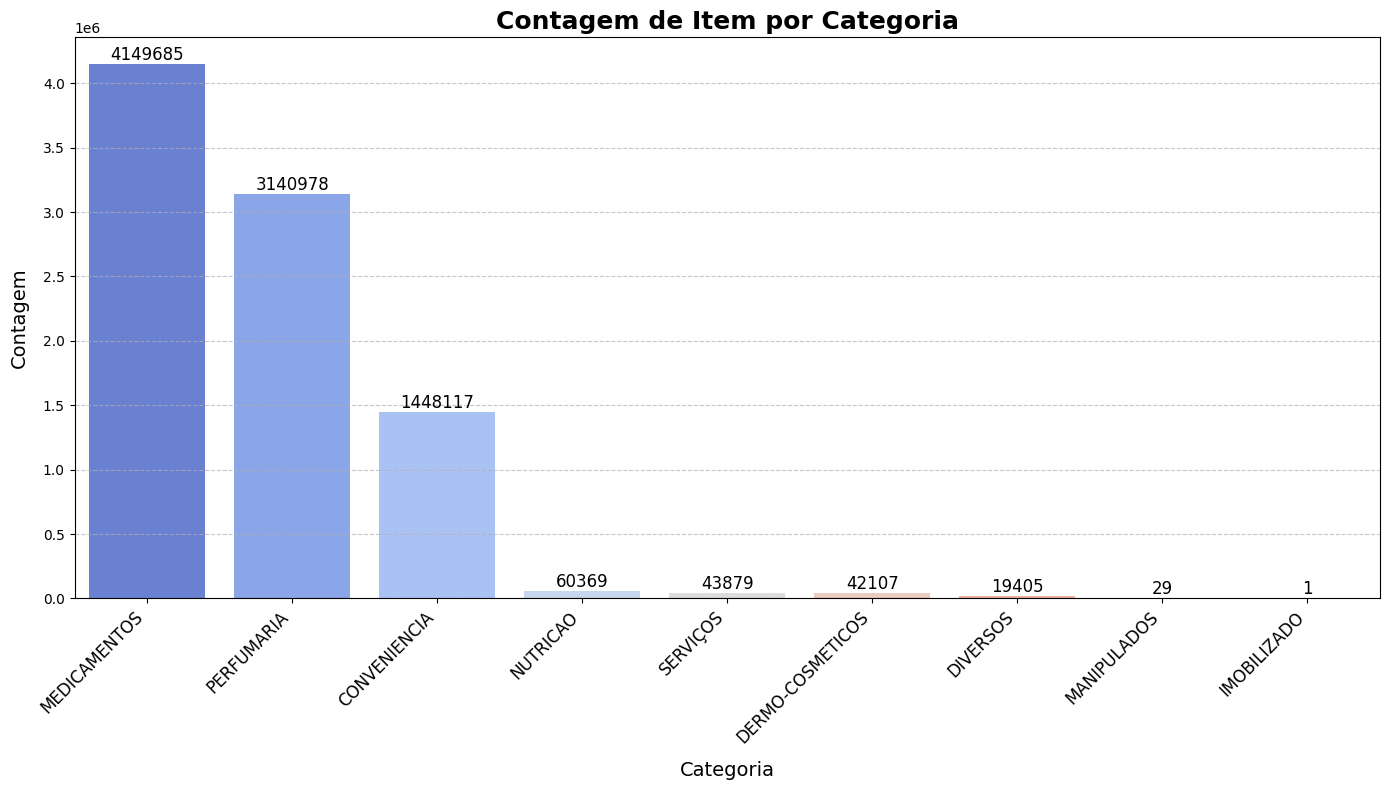

In [63]:
cat_sku_count = df['CATEGORIA_SKU'].value_counts()

plt.figure(figsize=(14, 8))

sns.barplot(x=cat_sku_count.index, y=cat_sku_count.values, hue=cat_sku_count.index, palette='coolwarm')

plt.title('Contagem de Item por Categoria', fontsize=18, weight='bold')
plt.xlabel('Categoria', fontsize=14, labelpad=10)
plt.ylabel('Contagem', fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(cat_sku_count.values):
    plt.text(index, value + 1, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Discount Impact on Revenue

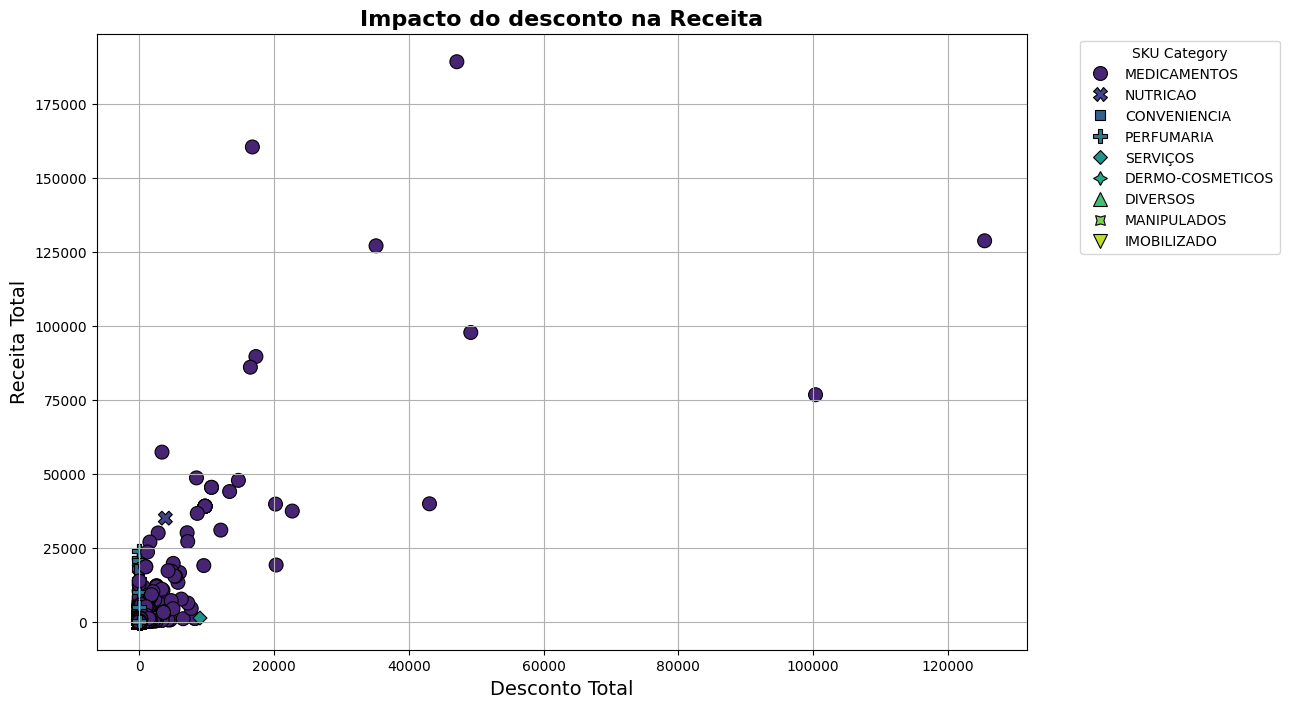

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TOTAL_DESCONTO', y='TOTAL_LIQUIDO', hue='CATEGORIA_SKU', style='CATEGORIA_SKU', s=100, palette='viridis', edgecolor='black')
plt.title('Impacto do desconto na Receita', fontsize=16, fontweight='bold')
plt.ylabel('Receita Total', fontsize=14)
plt.xlabel('Desconto Total', fontsize=14)
plt.grid(True)
plt.legend(title='SKU Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Suggests a positive relationship between discount and revenue, where higher discounts generally lead to higher revenue. There are several points that stand out as outliers and show the imbalance of SKU Category

# Biggest units sales

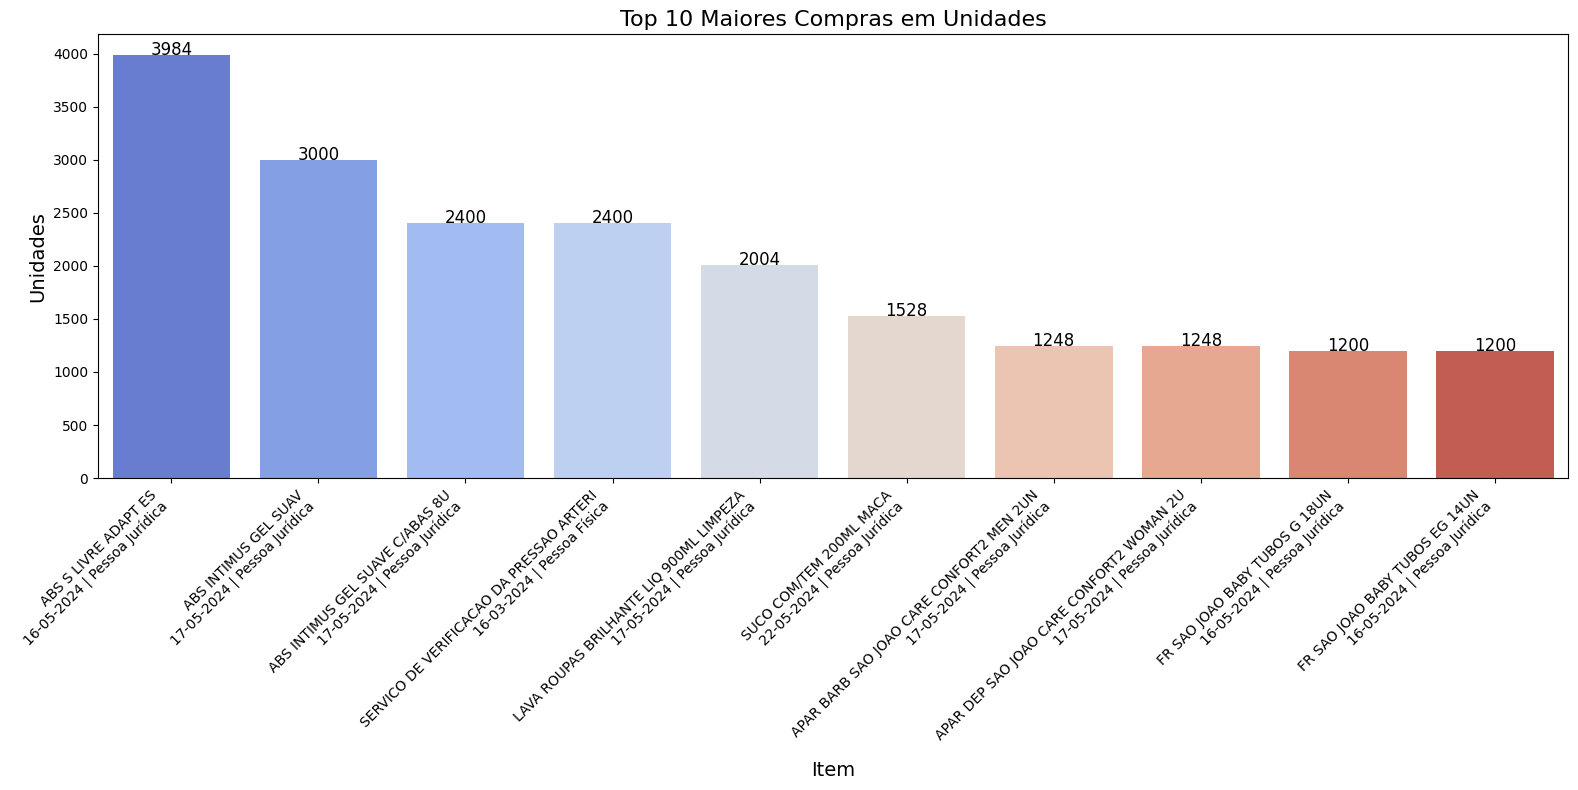

In [65]:
top_10_units = df.nlargest(10, 'UNIDADES')

top_10_units['Date'] = pd.to_datetime(top_10_units['DATA_CUPOM']).dt.strftime('%d-%m-%Y')
top_10_units['Item_Label'] = top_10_units['SKU'] + '\n' + top_10_units['Date'] + ' | ' + top_10_units['CLIENTE_FISICO_JURIDICO']

plt.figure(figsize=(16, 8))
sns.barplot(x='Item_Label', y='UNIDADES', data=top_10_units, hue='Item_Label', palette='coolwarm')

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_units['UNIDADES']):
    plt.text(index, value + 0.5, f'{value:.0f}', ha='center', fontsize=12)

plt.title('Top 10 Maiores Compras em Unidades', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Unidades', fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()


## The majority of these sales occured during the floods in May

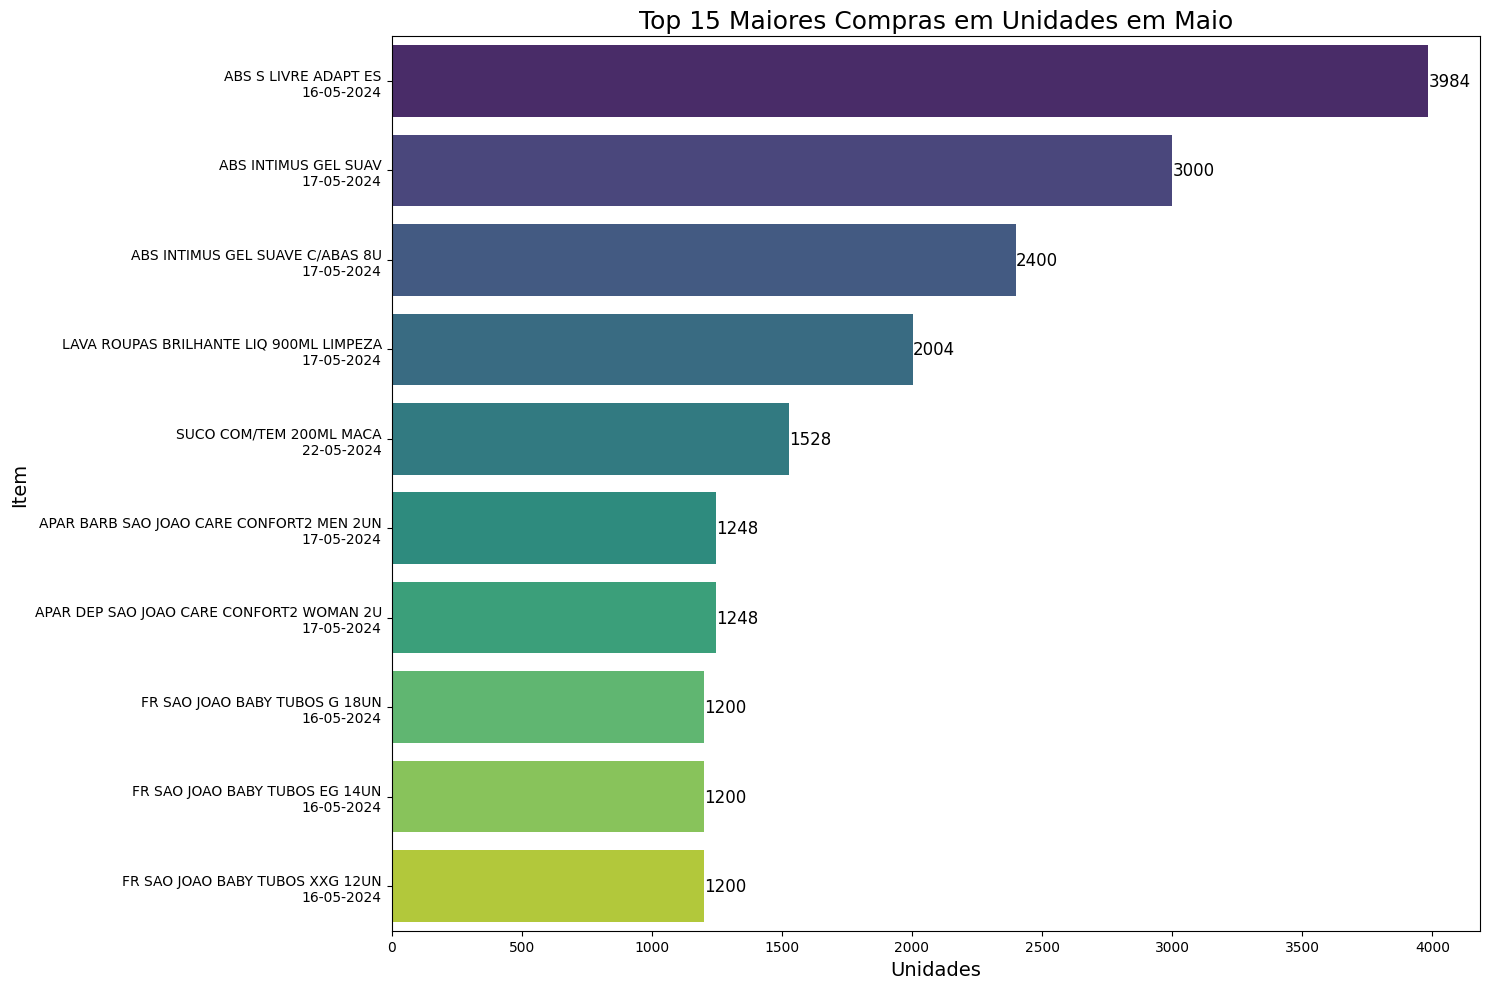

In [66]:
top_10_units_flood = df[df['DATA_CUPOM'].dt.month == 5].nlargest(10, 'UNIDADES')

top_10_units_flood['Date'] = pd.to_datetime(top_10_units_flood['DATA_CUPOM']).dt.strftime('%d-%m-%Y')
top_10_units_flood['Item_Label'] = top_10_units_flood['SKU'] + '\n' + top_10_units_flood['Date'] 

plt.figure(figsize=(15, 10))
sns.barplot(x='UNIDADES', y='Item_Label', data=top_10_units_flood, palette='viridis')

for index, value in enumerate(top_10_units_flood['UNIDADES']):
    plt.text(value + 0.5, index, f'{value:.0f}', va='center', fontsize=12)

plt.title('Top 15 Maiores Compras em Unidades em Maio', fontsize=18)
plt.xlabel('Unidades', fontsize=14)
plt.ylabel('Item', fontsize=14)


plt.tight_layout()
plt.show()

# Net Total Over the Days During the Months

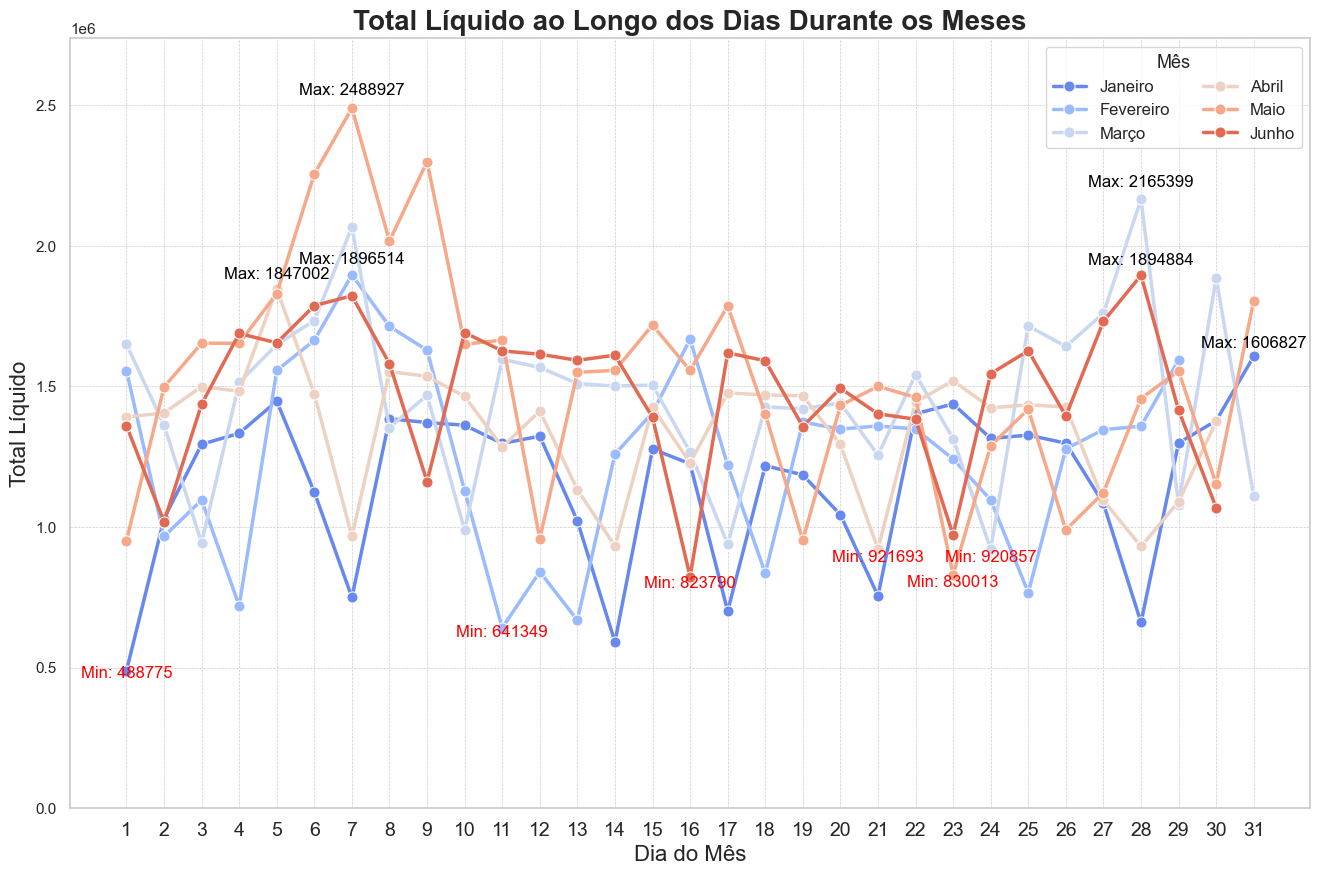

In [67]:
df_time = df[['DATA_CUPOM', 'TOTAL_LIQUIDO']]
df_time['Day'] = df_time['DATA_CUPOM'].dt.day
df_time['Month'] = df_time["DATA_CUPOM"].dt.month

df_agg = df_time.groupby(['Month', 'Day'])['TOTAL_LIQUIDO'].sum().reset_index()

month_names = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
               7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
df_agg['Month'] = df_agg['Month'].map(month_names)

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

palette = sns.color_palette("coolwarm", len(df_agg['Month'].unique()))

sns.lineplot(
    x='Day', 
    y='TOTAL_LIQUIDO', 
    hue='Month', 
    data=df_agg, 
    palette=palette, 
    marker='o', 
    linewidth=2.5,
    markersize=8,
    ci=None
)

for month in df_agg['Month'].unique():
    month_data = df_agg[df_agg['Month'] == month]
    max_day = month_data.loc[month_data['TOTAL_LIQUIDO'].idxmax()]
    min_day = month_data.loc[month_data['TOTAL_LIQUIDO'].idxmin()]
    
    plt.text(max_day['Day'], max_day['TOTAL_LIQUIDO'] + 0.02 * max_day['TOTAL_LIQUIDO'], 
             f"Max: {max_day['TOTAL_LIQUIDO']:.0f}", 
             horizontalalignment='center', fontsize=12, color='black')
    
    plt.text(min_day['Day'], min_day['TOTAL_LIQUIDO'] - 0.05 * min_day['TOTAL_LIQUIDO'], 
             f"Min: {min_day['TOTAL_LIQUIDO']:.0f}", 
             horizontalalignment='center', fontsize=12, color='red')

plt.title('Total Líquido ao Longo dos Dias Durante os Meses', fontsize=20, fontweight='bold')
plt.xlabel('Dia do Mês', fontsize=16)
plt.ylabel('Total Líquido', fontsize=16)
plt.xticks(fontsize=14)

plt.xticks(ticks=range(1, 32), labels=range(1, 32), rotation=0)

plt.legend(title='Mês', title_fontsize='13', fontsize='12', loc='upper right', ncol=2)

plt.ylim(0, df_agg['TOTAL_LIQUIDO'].max() * 1.1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

# Awkward dates

In [68]:
def is_out_of_bounds(date_str):
    try:
        year = int(str(date_str).split('-')[0])
        if year < 1900 or year > datetime.now().year:
            return True
    except (ValueError, TypeError):
        return True

In [69]:
df['DTNASCIMENTO_CLIENTE'] = df['DTNASCIMENTO_CLIENTE'].replace('None', np.nan)
df_corrected_dt_cliente = df.dropna(subset=['DTNASCIMENTO_CLIENTE'])

out_of_bounds = df_corrected_dt_cliente.loc[
    pd.to_datetime(df_corrected_dt_cliente['DTNASCIMENTO_CLIENTE'], errors='coerce').isna() | 
    df_corrected_dt_cliente['DTNASCIMENTO_CLIENTE'].apply(is_out_of_bounds)
]

unique_out_of_bounds = set(out_of_bounds['DTNASCIMENTO_CLIENTE'].dropna().apply(lambda x: x.strftime('%Y-%m-%d')))
formatted_dates = ', '.join(sorted(unique_out_of_bounds))

In [70]:
print(f"Unique out-of-bounds dates: {formatted_dates}", end='\t')

Unique out-of-bounds dates: 1111-11-11, 1198-04-17, 1598-01-20, 1845-05-15, 1848-01-01, 1852-05-19, 1857-06-22, 1870-05-16, 1887-08-07, 1888-01-01, 1888-12-10, 1889-01-01, 1891-05-14, 1898-01-01, 1899-01-01, 1899-03-21, 1899-05-12, 1899-12-12, 2043-08-29, 2045-05-04, 2046-02-20, 2047-12-27, 2048-06-01, 2048-11-30, 2049-09-23	

In [71]:
out_of_bounds.DTNASCIMENTO_CLIENTE.value_counts()

DTNASCIMENTO_CLIENTE
1111-11-11    59
1898-01-01    57
2049-09-23    10
1888-01-01     5
1899-05-12     5
1899-03-21     4
2045-05-04     4
1891-05-14     3
1870-05-16     3
1857-06-22     3
1848-01-01     3
2047-12-27     3
1899-12-12     3
2048-11-30     3
1852-05-19     2
1888-12-10     2
1889-01-01     2
1887-08-07     2
1598-01-20     2
2048-06-01     2
1845-05-15     2
1198-04-17     2
2046-02-20     1
1899-01-01     1
2043-08-29     1
Name: count, dtype: int64

# Average Spend by Age Group

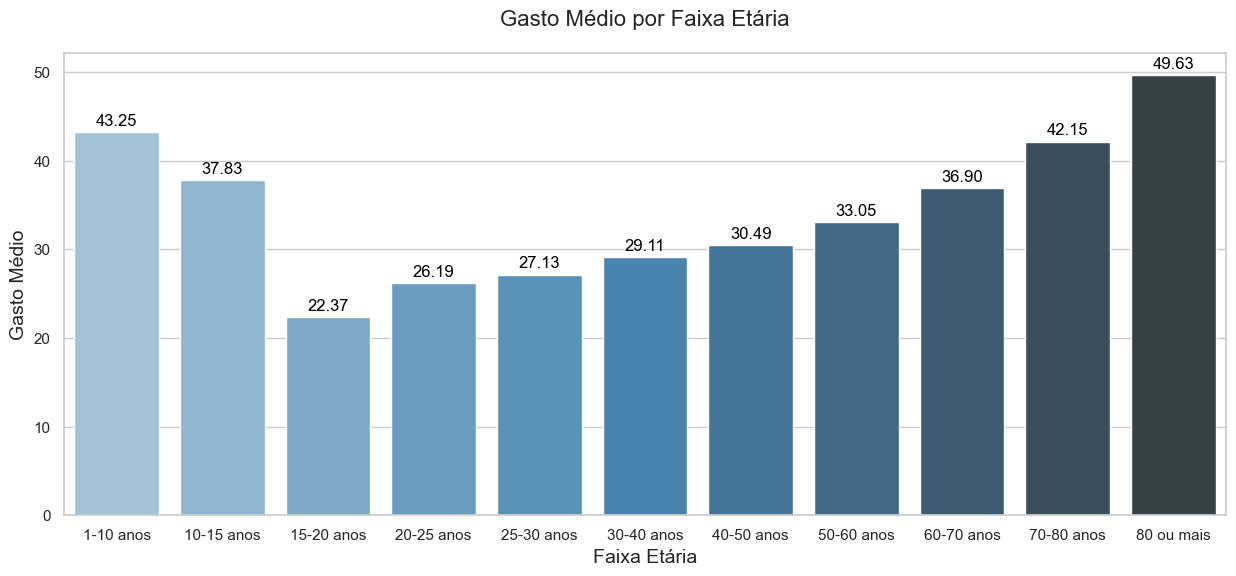

In [72]:
clientes_data = df[['TOTAL_LIQUIDO', 'DTNASCIMENTO_CLIENTE', 'COD_CLIENTE']].drop_duplicates()
clientes_data['DTNASCIMENTO_CLIENTE'] = pd.to_datetime(clientes_data['DTNASCIMENTO_CLIENTE'], errors='coerce')
clientes_data['IDADE'] = (pd.to_datetime('today') - clientes_data['DTNASCIMENTO_CLIENTE']).dt.days // 365

faixas_etarias = pd.cut(clientes_data['IDADE'], bins = [1, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])
gastos_por_faixa_etaria = clientes_data.groupby(faixas_etarias, observed=True).agg({
    'TOTAL_LIQUIDO': 'mean',
    'COD_CLIENTE': 'count'
}).rename(columns={'TOTAL_LIQUIDO': 'Gasto_Medio_Por_Compra', 'COD_CLIENTE': 'Total_Compras'})

rotulos_faixas_etarias = ['1-10 anos', '10-15 anos', '15-20 anos', '20-25 anos', '25-30 anos', '30-40 anos', 
          '40-50 anos', '50-60 anos', '60-70 anos', '70-80 anos', '80 ou mais']

plt.figure(figsize=(15, 6))
ax = sns.barplot(
    x=rotulos_faixas_etarias,
    y=gastos_por_faixa_etaria['Gasto_Medio_Por_Compra'],
    palette='Blues_d',
    dodge=False
)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.legend([], [], frameon=False)  
plt.title('Gasto Médio por Faixa Etária', fontsize=16, pad=20)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Gasto Médio', fontsize=14)
plt.xticks(rotation=0)
plt.show()


# Best stores

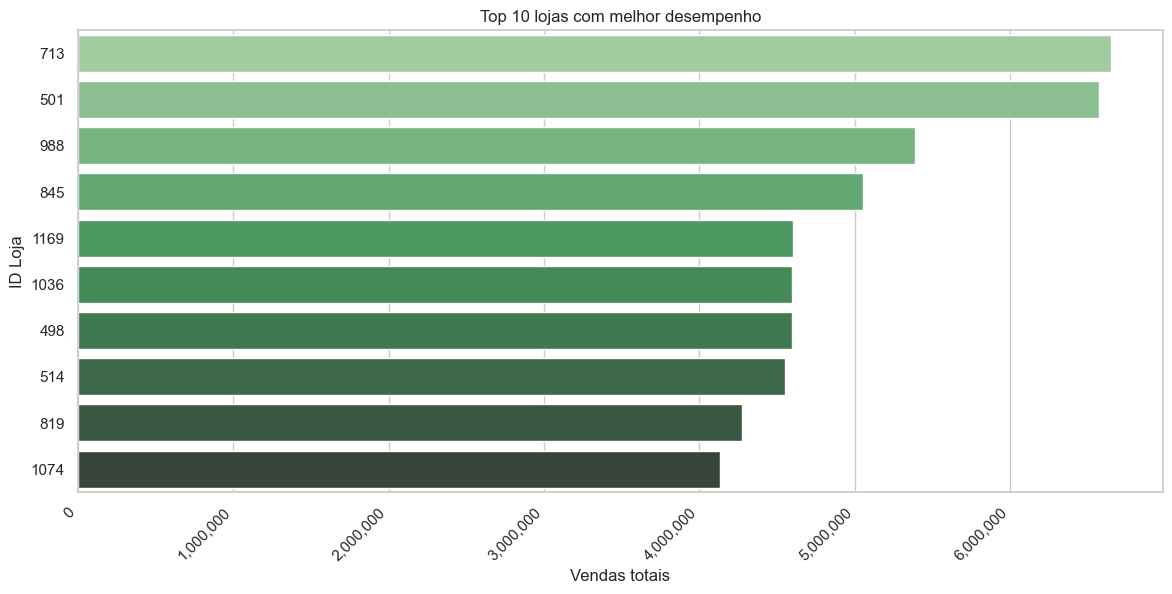

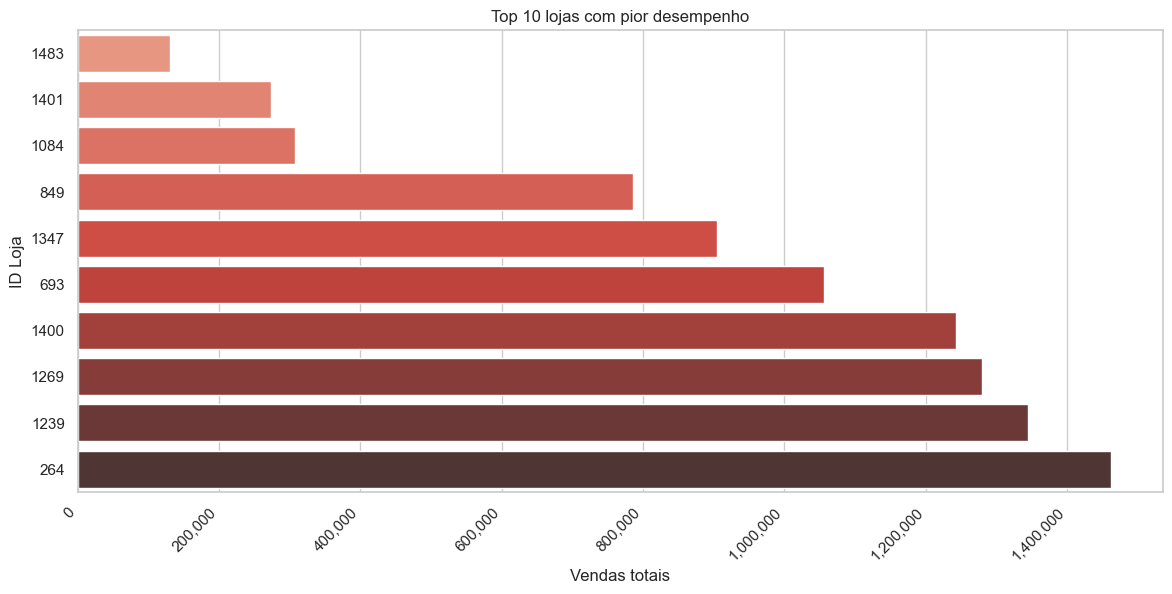

In [73]:
store_performance = df.groupby(['COD_LOJA']).agg({
    'TOTAL_LIQUIDO': 'sum',
    'COD_CUPOM': 'count'
}).rename(columns={'TOTAL_LIQUIDO': 'Total_Sales', 'COD_CUPOM': 'Number_of_Transactions'})


top_performing_stores = store_performance.sort_values(by='Total_Sales', ascending=False).head(10)
underperforming_stores = store_performance.sort_values(by='Total_Sales').head(10)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=top_performing_stores['Total_Sales'],
    y=top_performing_stores.index.astype(str),
    hue=top_performing_stores.index.astype(str),  
    palette='Greens_d',
    dodge=False
)
plt.xlabel('Vendas totais')
plt.ylabel('ID Loja')
plt.title('Top 10 lojas com melhor desempenho')
plt.legend([], [], frameon=False)  
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}')) 
plt.show()


plt.figure(figsize=(14, 6))
sns.barplot(
    x=underperforming_stores['Total_Sales'],
    y=underperforming_stores.index.astype(str),
    hue=underperforming_stores.index.astype(str),  
    palette='Reds_d',
    dodge=False
)
plt.xlabel('Vendas totais')
plt.ylabel('ID Loja')
plt.title('Top 10 lojas com pior desempenho')
plt.legend([], [], frameon=False)  
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}')) 
plt.show()

# Sales from Hour and Day 

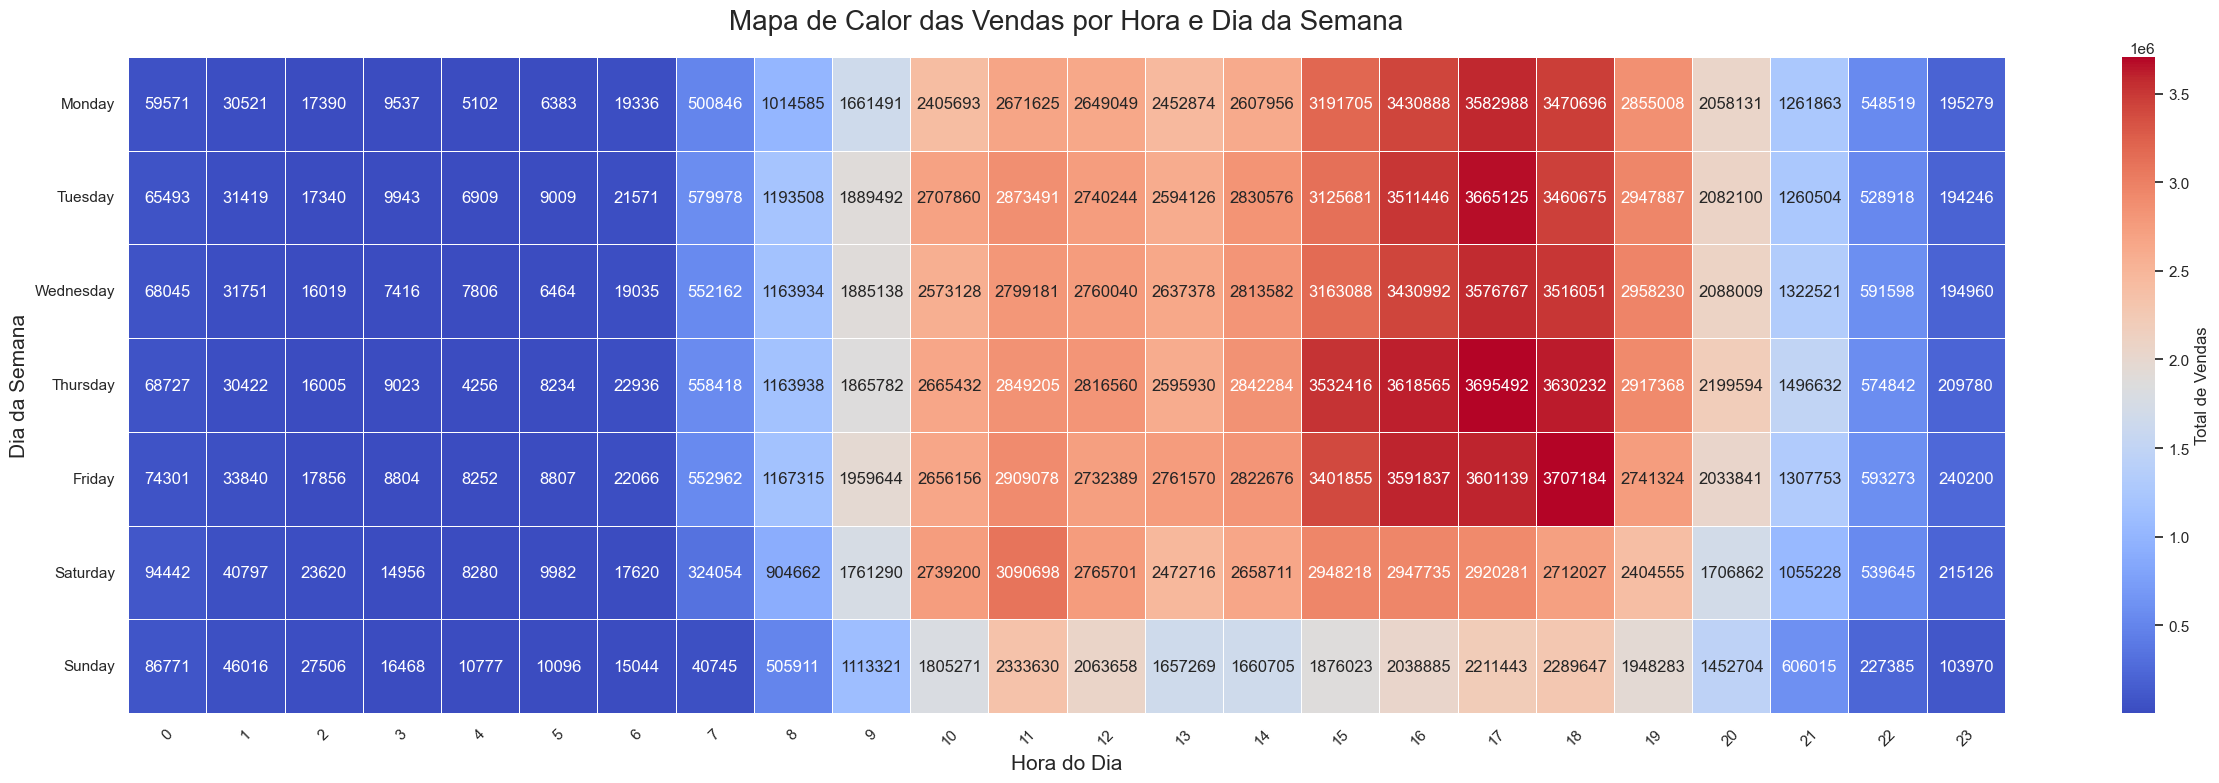

In [74]:
df_peak_sales = df.copy()
df_peak_sales['Hora'] = df['DATA_CUPOM'].dt.hour
df_peak_sales['Dia_da_Semana'] = df['DATA_CUPOM'].dt.day_name()

horarios_pico_vendas = df_peak_sales.groupby(['Dia_da_Semana', 'Hora']).agg({
    'TOTAL_LIQUIDO': 'sum'
}).rename(columns={'TOTAL_LIQUIDO': 'Total_Vendas'}).reset_index()

ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
horarios_pico_vendas_pivot = horarios_pico_vendas.pivot(index='Dia_da_Semana', columns='Hora', values='Total_Vendas')
horarios_pico_vendas_pivot = horarios_pico_vendas_pivot.reindex(ordem_dias)

plt.figure(figsize=(25, 8))
sns.heatmap(horarios_pico_vendas_pivot, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total de Vendas'})
plt.title('Mapa de Calor das Vendas por Hora e Dia da Semana', fontsize=20, pad=20)
plt.xlabel('Hora do Dia', fontsize=15)
plt.ylabel('Dia da Semana', fontsize=15)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()

# Top Items Sold

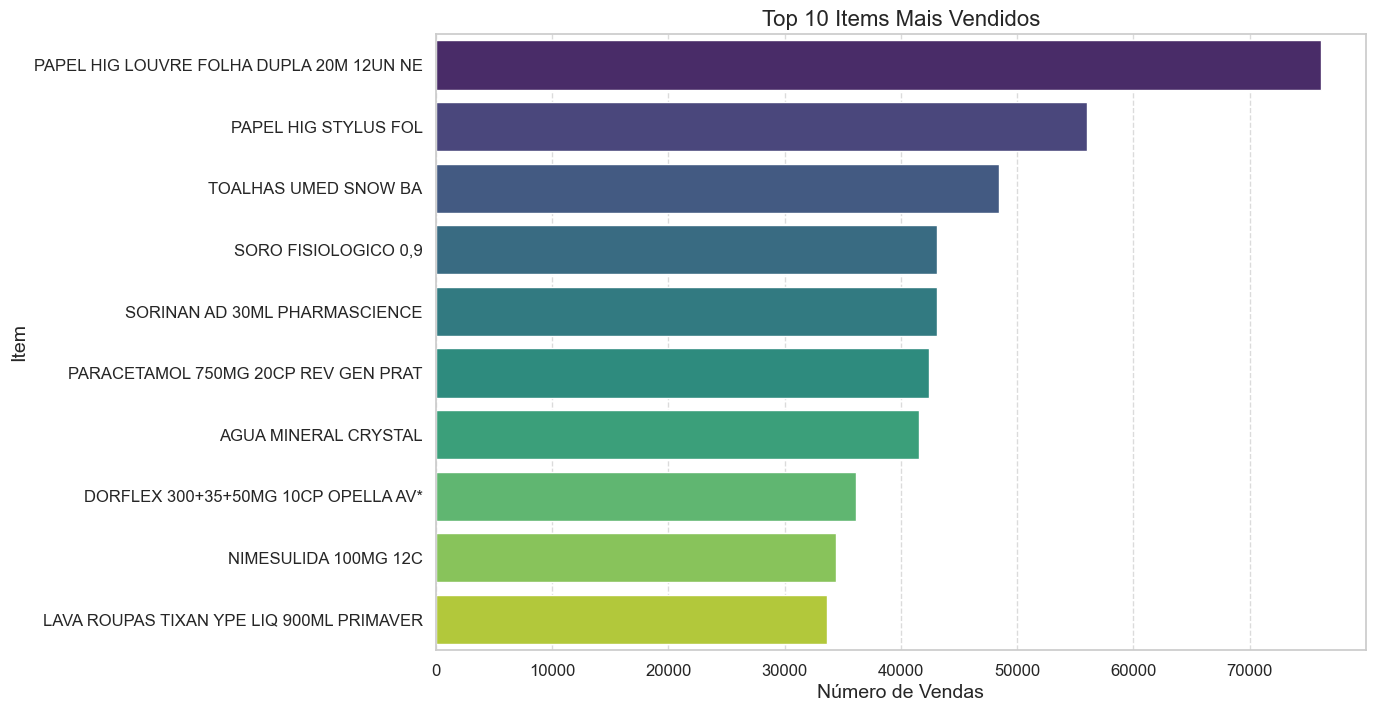

In [75]:
sku_counts = df['SKU'].value_counts().reset_index()
sku_counts.columns = ['SKU', 'Count']

# Filter to show only the top 10 items
top_sku_counts = sku_counts.head(10)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='SKU', data=top_sku_counts, palette='viridis', hue='SKU', dodge=False, legend=False)
plt.title('Top 10 Items Mais Vendidos', fontsize=16)
plt.xlabel('Número de Vendas', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

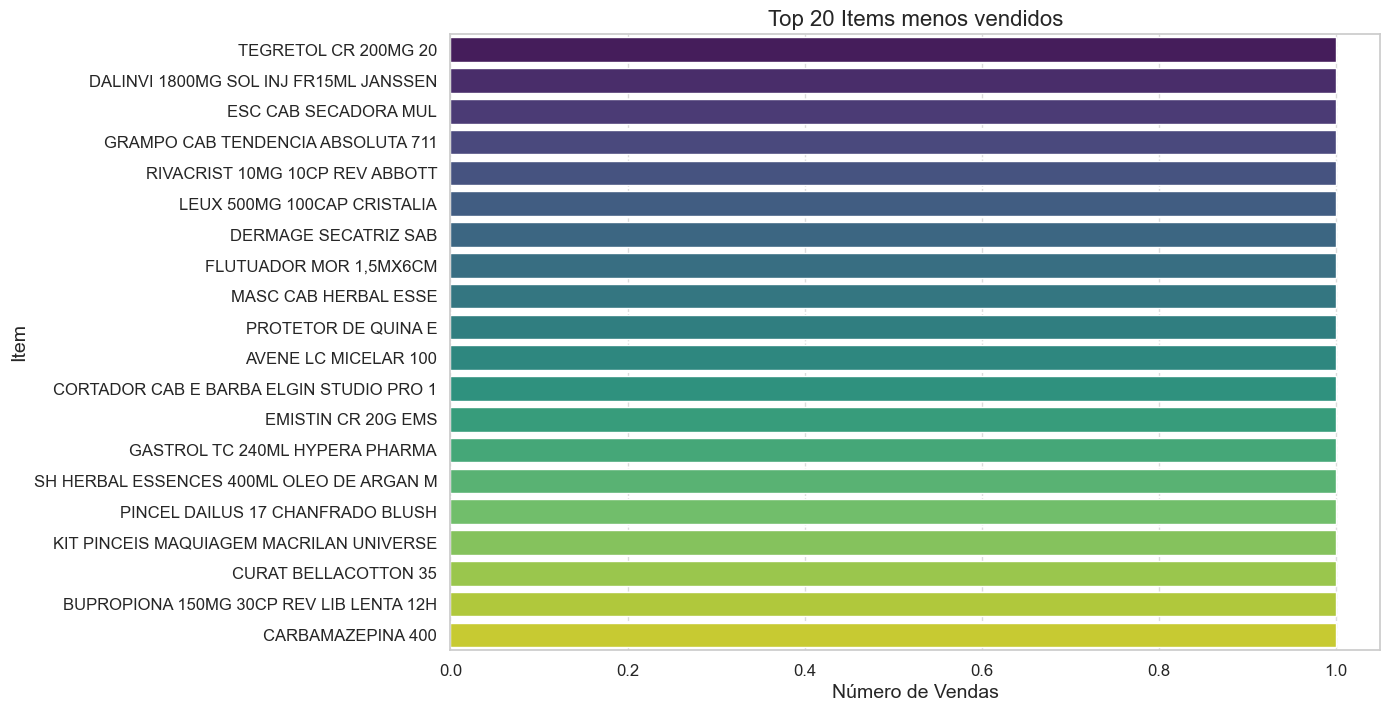

In [76]:
tail_sku_counts = sku_counts.tail(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='SKU', data=tail_sku_counts, palette='viridis', hue='SKU', dodge=False, legend=False)
plt.title('Top 20 Items menos vendidos', fontsize=16)
plt.xlabel('Número de Vendas', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [77]:
only_one_sale = sku_counts[sku_counts["Count"] == 1]
print(f'There are {only_one_sale.shape[0]} itens that were sold only once.')

There are 1012 itens that were sold only once.


# Amount of Items per transaction

In [78]:
df_transactions = df[['DATA_CUPOM', 'COD_CLIENTE', 'COD_LOJA', 'SKU']]	
df_transactions.COD_CLIENTE = df_transactions.COD_CLIENTE.replace(0.0, np.nan)
df_transactions.dropna(subset=['COD_CLIENTE'], inplace=True)

In [79]:
df_transactions = df_transactions.groupby(by=['COD_CLIENTE', 'COD_LOJA', 'DATA_CUPOM'])["SKU"].apply(list).reset_index()
df_transactions["Number_of_Items"] = df_transactions["SKU"].apply(len)

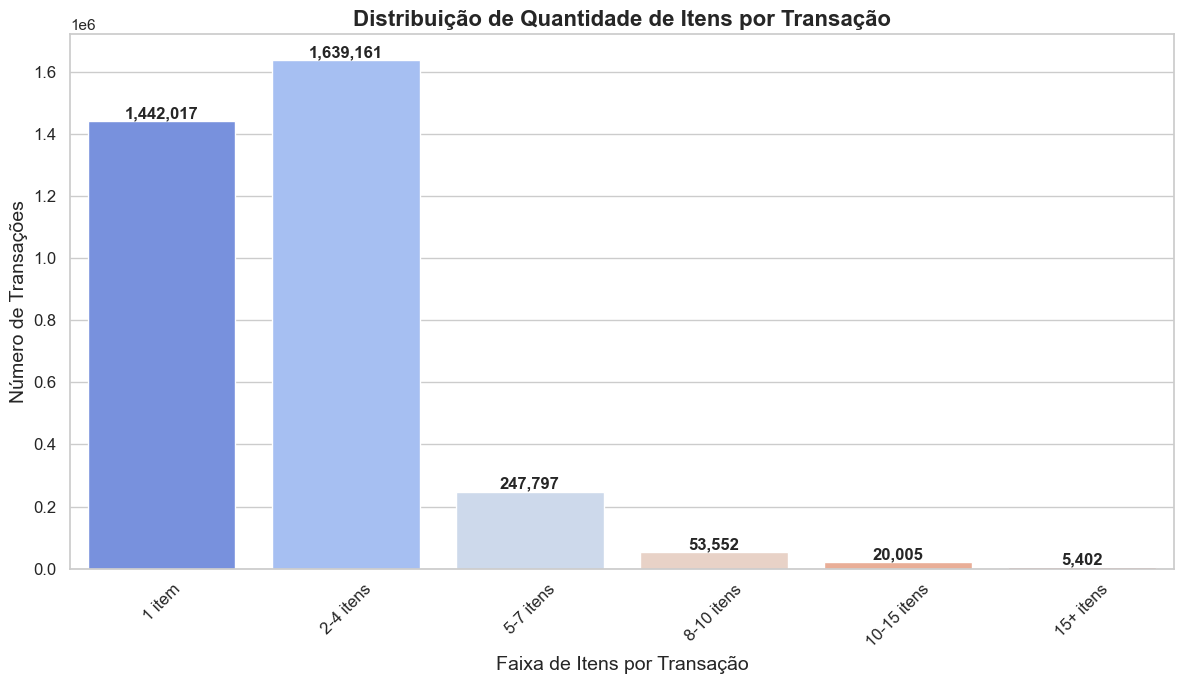

In [80]:
bins = [0, 1, 4, 7, 10, 15, float('inf')]
labels = ['1 item', '2-4 itens', '5-7 itens', '8-10 itens', '10-15 itens', 
          '15+ itens']

categories = pd.cut(df_transactions["Number_of_Items"], bins=bins, labels=labels, right=True)

category_counts = categories.value_counts().sort_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.xlabel('Faixa de Itens por Transação', fontsize=14)
plt.ylabel('Número de Transações', fontsize=14)
plt.title('Distribuição de Quantidade de Itens por Transação', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for i in range(len(category_counts)):
    ax.text(i, category_counts.values[i] + 0.5, f'{category_counts.values[i]:,}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
